In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random

# Needed to use matplotlib in a Jupyter environment
%matplotlib inline

# seeded random state for reproducibility
np.random.seed(1)

In [2]:
num_samples = 1000
# Data of class A
A = np.random.normal(0, 0.75, size=(num_samples, 2))
# Data of class B
B = np.random.normal(3, 0.75, size=(num_samples, 2))
# A is labelled as 0 and B is labelled as 1
y = [0 if i < num_samples else 1 for i in range(num_samples*2)]
input_data = np.concatenate([A, B], axis=0)

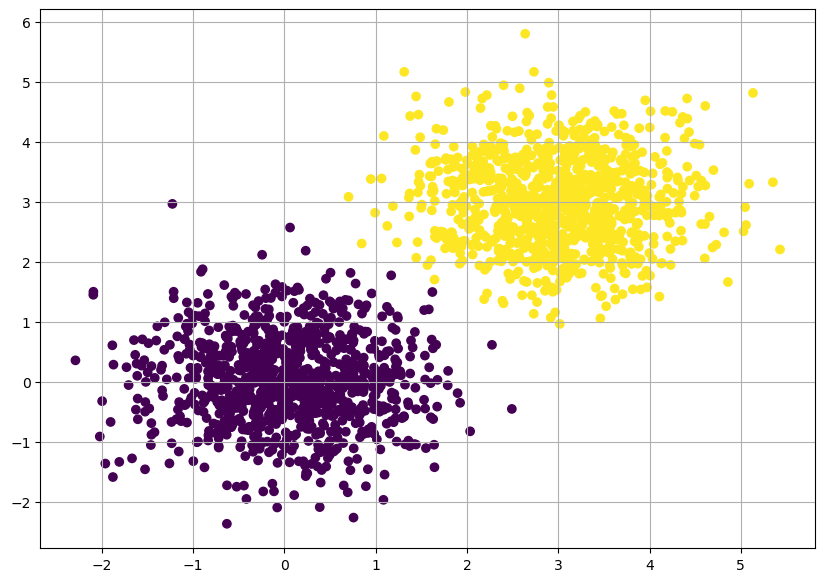

In [3]:
plt.figure(figsize = (10,7))
plt.scatter(input_data[:,0], input_data[:,1], c=y)
plt.grid()
plt.show()

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=8):
        super().__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_dim, 1)
        self.output = nn.Sigmoid()
        
    def forward(self, x):
        l1 = self.l1(x)
        l1_relu = self.relu(l1)
        l2 = self.l2(l1_relu)
        output = self.output(l2)
        
        return output

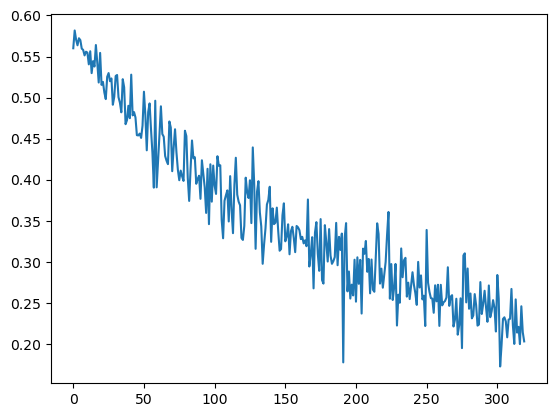

In [11]:
# Sample data
data = list(zip(input_data, y))
model = NeuralNetwork(2, 8)

# Training setup
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
bce = nn.BCELoss()

# batch size
batch_size = 64
loss_list = []

# Training loop with batching
for epoch in range(10):
    random.shuffle(data)
    
    # Create batches
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        batch_x = torch.tensor(np.asarray([x for x, _ in batch])).float()
        batch_target = torch.tensor(np.asarray([target for _, target in batch])).float()
        
        optimizer.zero_grad()
        pred = model(batch_x).squeeze(1)
        loss = bce(pred, batch_target)
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.detach().item())

# Plot the loss
plt.plot(loss_list)
plt.show()

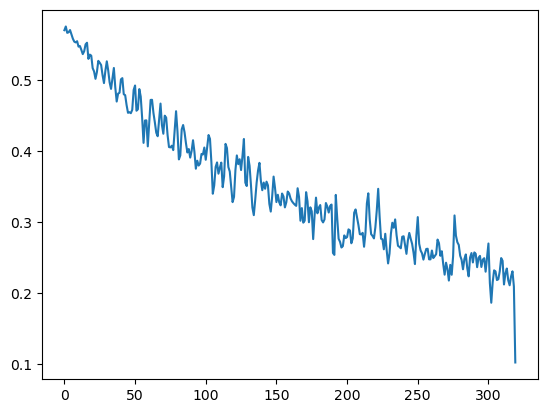

In [13]:
def smooth_loss_curve(loss_curve, window_size=max(128//batch_size, 1)):
    return np.convolve(loss_curve, np.ones(window_size)/window_size)[window_size-1:]

loss_curve = smooth_loss_curve(loss_list)
plt.plot(loss_curve)
plt.show()